<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_114_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 114: Hierarchical Clustering -  Evaluation Metrics

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Hierarchical Clustering - Evaluation Metrics|
|||
|**Class Description**|In this class, a student will cluster NGO dataset using K-Means algorithm and evaluate the performance of both the algorithms.|
|||
|**Class**|C114|
|||
|**Class Time**|45 minutes|
|||
|**Goal**|Visualising clusters obtained from Hierarchical clustering|
||Applying K-Means clustering algorithm|
||Evaluation using Silhouette score and DB Index|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

In the previous class, we learned how to determine whether a given dataset is suitable for clustering or not. We implemented agglomerative hierarchical clustering on an NGO dataset and obtained three clusters of countries.

In this class, we will visualise and analyse the derived clusters  and also implement the K-Means algorithm on the same dataset. We will also evaluate both the clustering algorithms using certain similarity metrics.


Before that, let us go through the concepts covered in the previous class and begin the class from **Activity 1: Visualising Clusters**







---

#### NGO Problem Statement

An international charitable NGO  raised around $\$$10 million after a few funding programmes. The CEO of the NGO needs to decide which countries are in immediate need of this fund so that these funds are utilised optimally and effectively.

Our job is to cluster the countries using some socio-economic and health factors that determine the overall development of the country and provide suggestions of the countries to the CEO of the NGO.

We will use a dataset of 167 countries consisting of following attributes:

|Attribute|Description|
|-|-|
|`country`|Name of the country.|
|`child_mort` | Death of children under 5 years of age per 1000 live births.|
|`exports`| Exports of goods and services per capita. Given as percentage of the GDP per capita.|
|`health`| Total health spending per capita. Given as percentage of GDP per capita.|
|`imports` | Imports of goods and services per capita. Given as percentage of the GDP per capita.|
|`income` | Net income per person.|
|`inflation` | The measurement of the annual growth rate of the Total GDP.|
|`life_expec` | The average number of years a new born child would live if the current mortality patterns are to remain the same.|
|`total_fer` |The number of children that would be born to each woman if the current age-fertility rates remain the same.|
|`gdpp` | The GDP per capita. Calculated as the Total GDP divided by the total population.|

**Dataset Credits:** https://www.kaggle.com/gauravduttakiit/help-international

---

#### Loading the Dataset





**Dataset Link:**  https://s3-whjr-curriculum-uploads.whjr.online/be99ea2b-cb07-4e52-b9ee-4c7e893ae48d.csv



In [ ]:
# Import the Python modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "https://s3-whjr-curriculum-uploads.whjr.online/be99ea2b-cb07-4e52-b9ee-4c7e893ae48d.csv"
ngo_df = pd.read_csv(file_path)
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
ngo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


There are **167 rows and 10 columns** and no missing values in the dataset. Out of the 10 columns, 9 are numerical and only 1 categorical column is present which is the name of the country.

---

#### Data Preparation and EDA

From the dataset description, we may observe that  the values of  `exports`, `health`, and `imports` columns are expressed in the form of percentage of the GDP (`gdpp`).

Let us change these column values from  percentage of total GDP to actual values, as the percentage values may not give a clear picture of that country.




In [ ]:
# Convert column values from percentage to actual values.
ngo_df['exports'] = (ngo_df['exports'] * ngo_df['gdpp']) / 100
ngo_df['health'] = (ngo_df['health'] * ngo_df['gdpp']) / 100
ngo_df['imports'] = (ngo_df['imports'] * ngo_df['gdpp']) / 100
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


Now, create a new DataFrame consisting of only numeric columns. Also we will scale the numerical DataFrame so that all the columns have the same mean and variance to perform clustering.

In [ ]:
# Keep only the numerical columns.
ngo_num = ngo_df.drop(['country'], axis = 1)
ngo_num.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


Now, normalize the columns of the DataFrame to scale them in a particular range.

In [ ]:
# Normalise the column values.
# Import StandardScaler module from sklearn
from sklearn.preprocessing import StandardScaler

# Create an object for StandardScaler()
standard_scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_values = standard_scaler.fit_transform(ngo_num)
ngo_scaled = pd.DataFrame(scaled_values)
ngo_scaled.columns = ngo_num.columns
ngo_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Now, we will try to understand the correlation between variables. For this, compute the correlation matrix among all the numeric variables and plot a heat map.

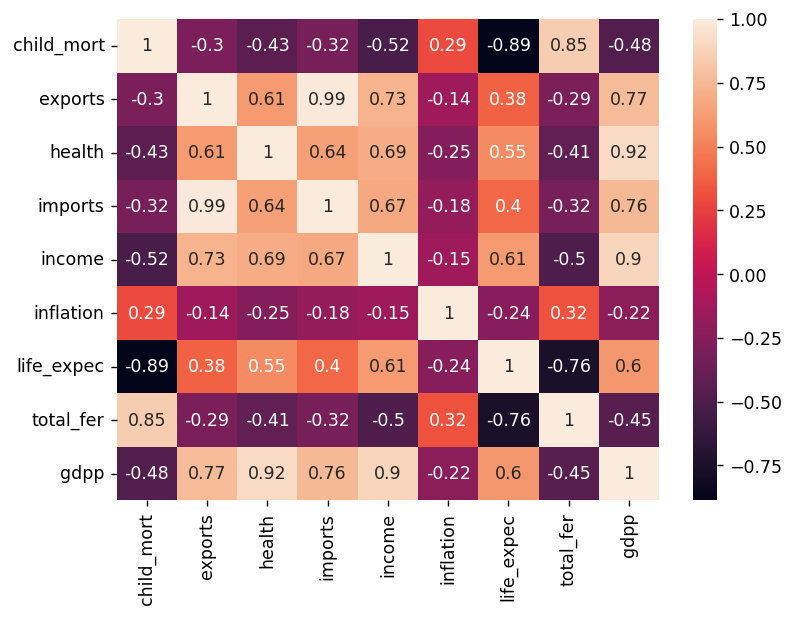

In [ ]:
# Create a corrleation heatmap.
corr_df = ngo_scaled.corr()
plt.figure(figsize = (7, 5), dpi = 125)
sns.heatmap(corr_df, annot = True)
plt.show()

From the above correlation heatmap, we can observe that:

- `gdpp` and `income` has  high positive correlated with correlation of `0.9`. This means that the countries where people have high income will have high GDP.

- `child_mort` and `life_expec` are negatively correlated with a high correlation of `-0.89`. Thus, child mortality rate greatly impacts the overall life expectancy of the population.

- `child_mort` and `total_fer` are highly correlated with correlation of `0.85`. It may be due to the fact that if child mortality is higher, people may opt for more children.

- `imports` and `exports` are highly correlated with correlation of `0.99`.

- `gdpp` and `health` are highly correlated with correlation of `0.92`.

- `life_expec` and `total_fer` are negatively correlated with a high correlation of `-0.76`.  It may be due to unavailability of  health care system for better care for children as well as care for family planning.

Let us now plot boxplots to understand the distribution of numerical columns and detect whether there are any outliers in the dataset. Use subplots to create these boxplots.

Before plotting boxplots, let us give colours to our boxplots by building a colour palette. To build a colour palette, use `color_palette()` function of `seaborn` module which will return a list of colours defining a palette.

For more detailed syntax of `color_palette()` function, use `help()` function.

seaborn.palettes._ColorPalette

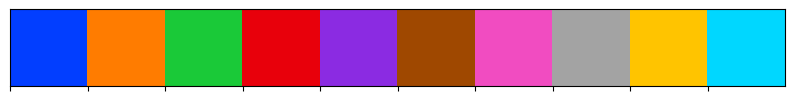

In [ ]:
# Save a palette to a variable.
bp_palette = sns.color_palette("bright")

# Use palplot and pass in the variable:
sns.palplot(bp_palette)
type(bp_palette)

Now, let's create boxplots for the numeric columns in the DataFrame using subplots.

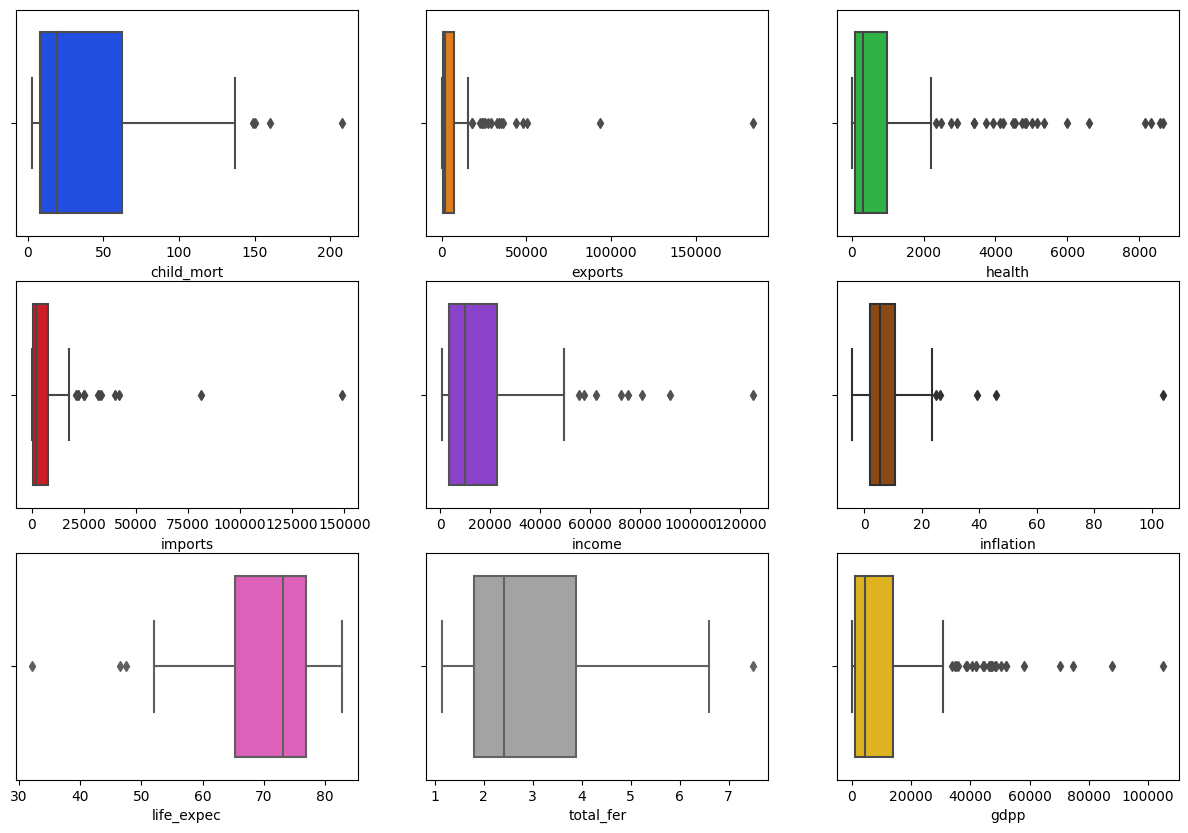

In [ ]:
# Create boxplots for numeric columns using subplot.
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10), dpi = 100, sharex = False)
# As there are 9 columns, we created subplot having 3 rows and 3 columns.
count = 0

for i in range(0, 3):
  for j in range (0, 3):
    column = ngo_num.iloc[:, count]    # Fetching the current column and all rows of that column.
    sns.boxplot(data = ngo_num, x = column, ax = axis[i, j], color = bp_palette[count])
    count = count + 1

plt.show()

We may observe that there is atleast one outlier in all the features. In case of gdpp and health, there are too many outliers.

However, since we have limited number of countries (167 countries), removing these outliers  based on IQR (Inter-quartile range) values would remove few countries that deserved the financial aid. Hence, we would not remove the outliers.



---

#### Determining Cluster Tendency

Before we apply any clustering algorithm to the given dataset, it is essential to determine whether the given data has any meaningful clusters or not. In general, we need to check whether the given dataset is not random.

This process of evaluating whether the dataset is feasible for clustering is known as **clustering tendency**. A well-known test for cluster tendency is the **Hopkins Test**.

**Hopkins test:**

- It is a statistical test that checks if the data follows uniform distribution.
- For example, refer to the following image which illustrates a uniformly distributed dataset.
<center>
    <img src="https://s3-whjr-v2-prod-bucket.whjr.online/58149855-5d35-407d-87f6-452344b69f41.png"/>

    `Image: An example of well-shaped 2D uniformly distributed dataset`

</center>

- Such uniformly distributed dataset is not suitable for clustering.

- If the hopkins score is low (tends to `0`), it means that the data is not uniformly distributed and can be used for clustering.

- If the hopkins score is high (above `0.5`), it means that the data is uniformly distributed and cannot be used for clustering.

**Implementing Hopkins Test using Python:**

- The `pyclustertend` is a Python toolkit for assessing cluster tendency.

- Let us first install `pyclustertend` module using `!pip install`.


In [ ]:
#Run this code cell to ensure `pyclustertend` works correctly.In case of issues try "Restart and run all" option under "Runtime"
!pip install sklearn --upgrade
!pip install numpy --upgrade
!pip install h5py
!pip install typing-extensions
!pip install wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Install 'pyclustertend'
!pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Once the `pyclustertend` module have been successfully installed, use  `hopkins()` function to determine the hopkins score for your dataset. The syntax for `hopkins()` function is as follows:

`pyclustertend.hopkins(data_frame, sampling_size)`

Where,
- `data_frame`:  The input dataset.
- `sampling_size`: The sampling size which is used to evaluate the number of DataFrame. This value must be equal to or less than the number of rows of our dataset.

    For example, If sampling size is 100, then this function generates 100 random data points which are uniformly distributed and then compares our dataset with these 100 points to determine how much they are similar. If our dataset is very similar to these random uniformly distributed dataset, then we will get a high score otherwise a low score.

This function returns a **hopkins score** of the dataset (between `0` and `1`).  A score tending to `0` express a high cluster tendency and a score around `0.5` express no clusterability.

Let us now perform hopkins test for `ngo_scaled` dataset using a sampling size equal to number of rows of our dataset (i.e. `167`).

**Note:** If you assume a sampling size greater than the number of rows, you will get an error stating that the sampling size is greater than DataFrame size.

In [ ]:
# Import hopkins and perform hopkins test for 'ngo_scaled' dataset.
from pyclustertend import hopkins
hopkins(ngo_scaled, 167)

0.08325186214829929

You may observe that the hopkins score obtained is almost `0`, indicating that our dataset has high cluster tendency.

Let us now proceed with dendrogram plotting followed by agglomerative clustering.

---

#### Agglomerative Clustering

Let us first plot dendrograms for both single linkage and complete linkage and select the one which yields the best result.

Follow the steps given below to plot the dendrogram for single linkage:

1. Import `linkage` and `dendrogram` modules from `scipy.cluster.hierarchy` module.
2. Call `linkage()` function and pass `ngo_scaled` dataset and `method = single` as inputs. Store the returned linkage matrix in a `s_distances` variable.
3.  Plot the dendrogram by calling the `dendrogram()` function and pass the linkage matrix `s_distances` as input to this function.

4. Also, set the `xlabel` and `ylabel` of this dendrogram using `matplotlib.pyplot` module.

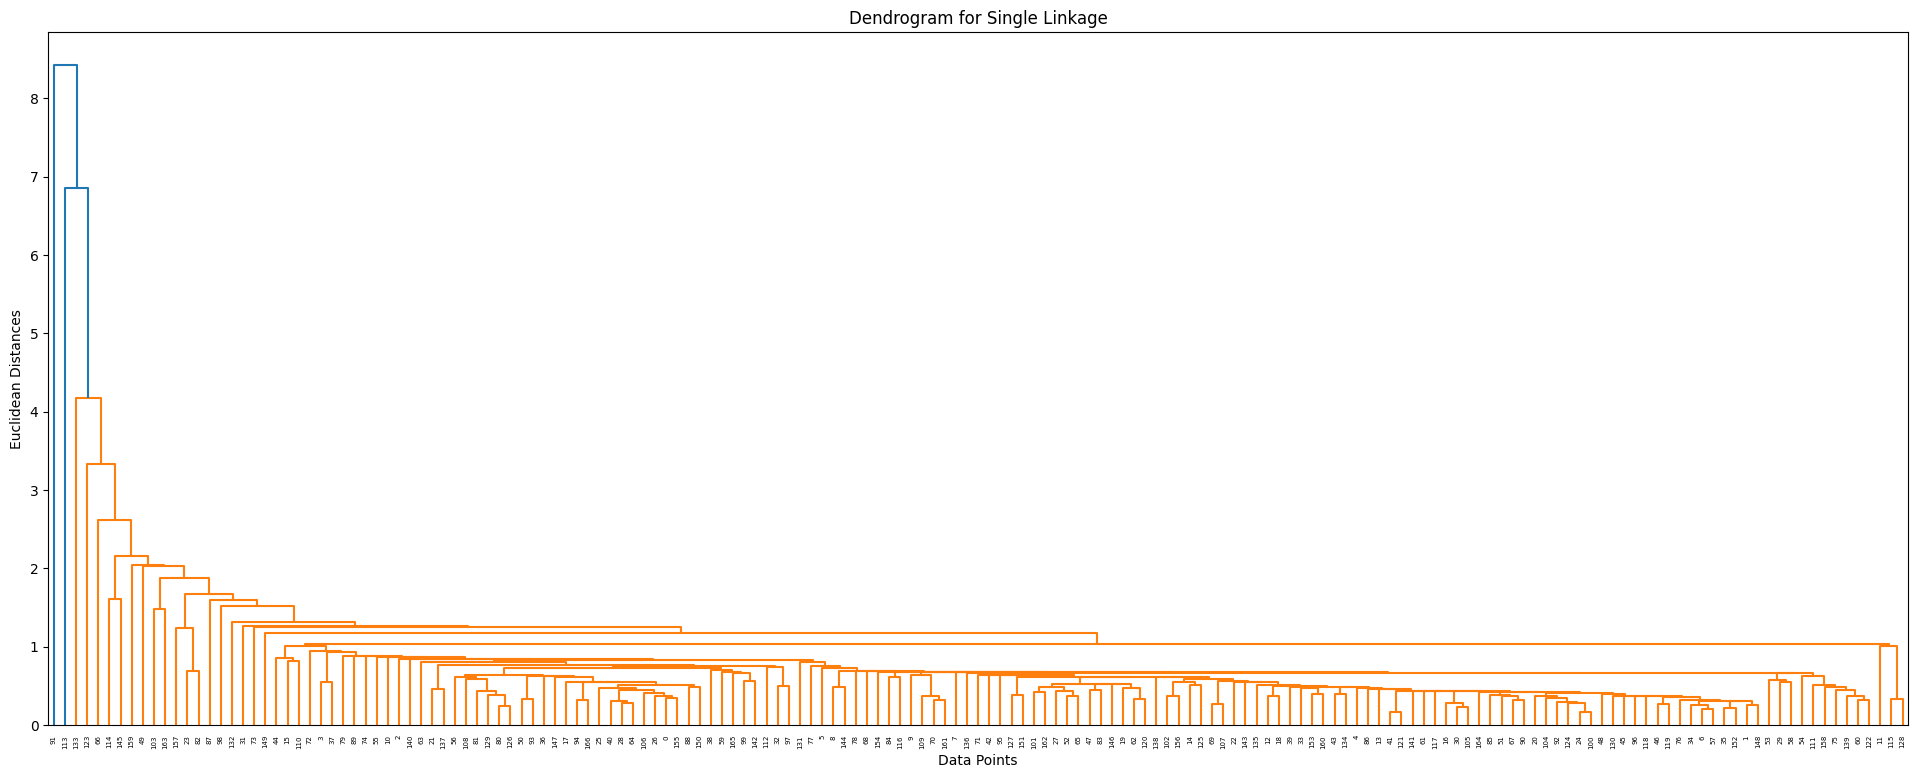

In [ ]:
# Plot dendrogram for single linkage.
from scipy.cluster.hierarchy import linkage, dendrogram
s_distances = linkage(ngo_scaled, method = "single")

plt.figure(figsize = (24, 9))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.title("Dendrogram for Single Linkage")
dendrogram(s_distances)
plt.show()

The clusters of the single linkage are not truly satisfying. It appears to be placing each outlier in its own cluster.

Let us plot dendrogram for complete linkage and observe the result.

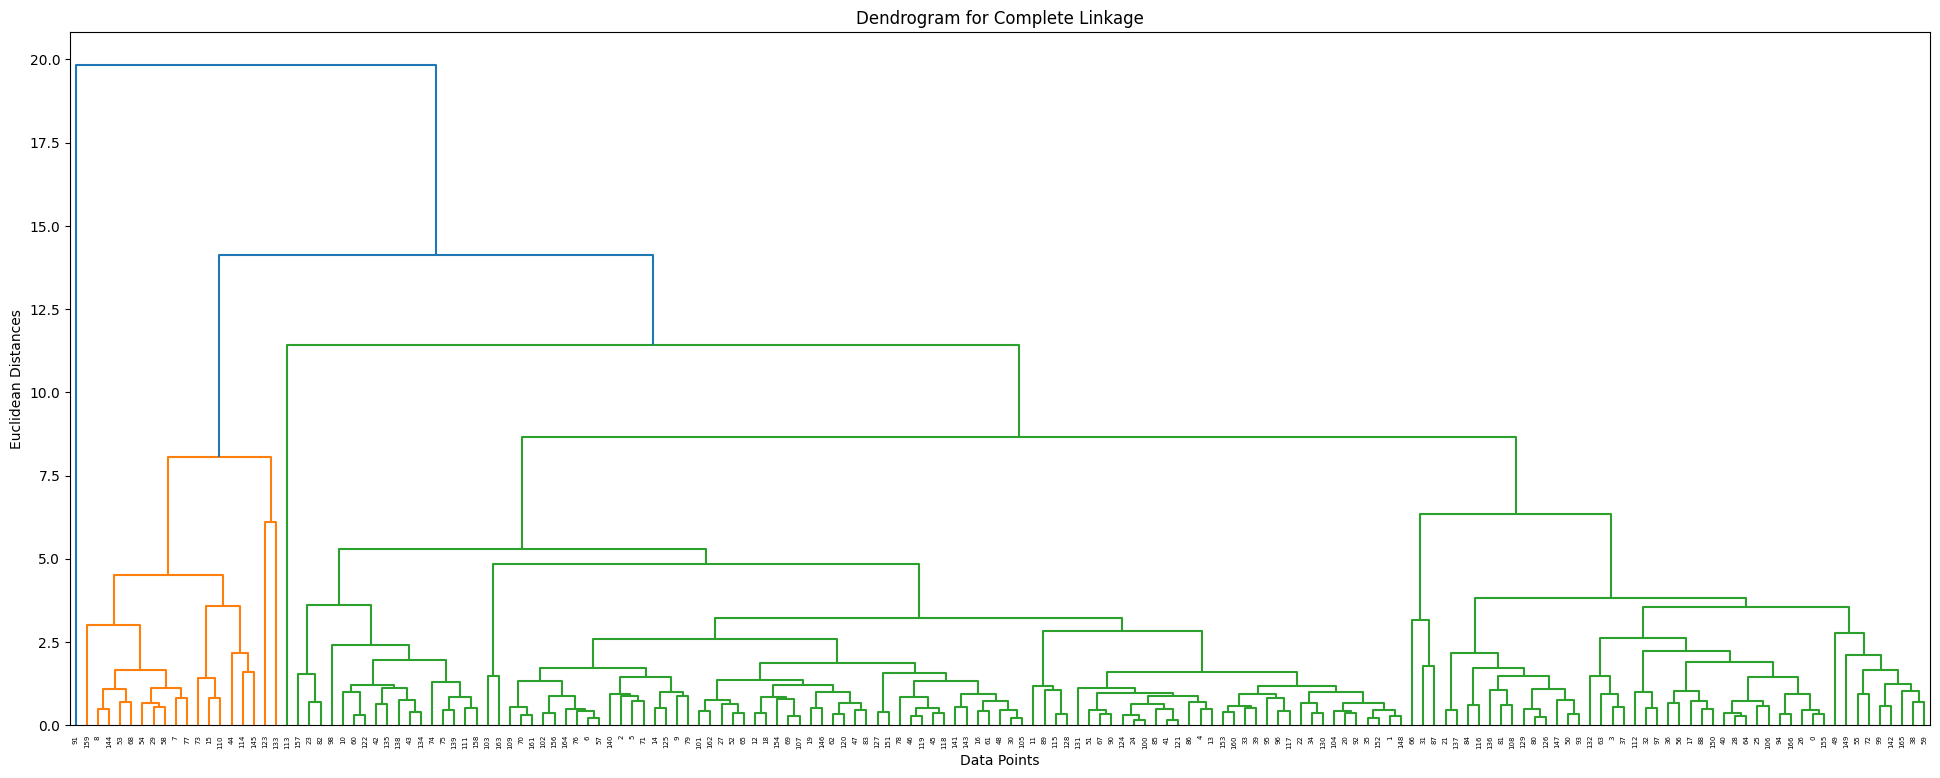

In [ ]:
# Plot dendrogram for complete linkage.
c_distances = linkage(ngo_scaled, method = "complete")

plt.figure(figsize=(24, 9))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.title("Dendrogram for Complete Linkage")
dendrogram(c_distances)
plt.show()

The result of complete linkage looks good. From the above plot, we observe that if we draw a horizontal line passing through the longest vertical blue line, it cuts the dendrogram at 3 points and also at 4 points. Hence, the number of clusters can be 3 or 4.

Let us obtain 3 clusters of countries using  agglomerative clustering on complete linkage.

In [ ]:
# S4.3: Determine the clusters using agglomerative clustering.
# Import AgglomerativeClustering module from sklearn
from sklearn.cluster import AgglomerativeClustering

# Perform AgglomerativeClustering using n_clusters = 3 and linkage = 'complete'
hc_3 = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

# Fit and predict the data using DataFrame
hcluster_3 = hc_3.fit_predict(ngo_scaled)
print(hcluster_3)

[0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]


As you can see in the output, our dataset is divided into 3 clusters labelled from `0` to `2`.

Let us add these predicted labels as a new column to original DataFrame `ngo_df`.

In [ ]:
# Adding the cluster ID back to the ngo_df DataFrame
ngo_df['H_Label'] = hcluster_3
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,H_Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


Let us determine the number of countries in each cluster.

In [ ]:
# Checking the country count per cluster
ngo_df['H_Label'].value_counts()

0    148
2     18
1      1
Name: H_Label, dtype: int64

Let us now analyse the clusters and identify the one which is in dire need of financial aid.

---

#### Activity 1: Visualising Clusters

From the domain understanding,  we know  that child mortality, income, GDP, and healthcare budget are some important factors that decide the development of any country. Hence, we will proceed with analysing the clusters by comparing how these 4 components (`child_mort`, `income`, `gdpp`, `health`) vary for each cluster of countries.

For this, let us create following four scatter plot using subplots:
1. Scatter plot of `gdpp` vs `child_mort`
2. Scatter plot of `income` vs `child_mort`
3. Scatter plot of `gdpp` vs `income`
4. Scatter plot of `income` vs `health`

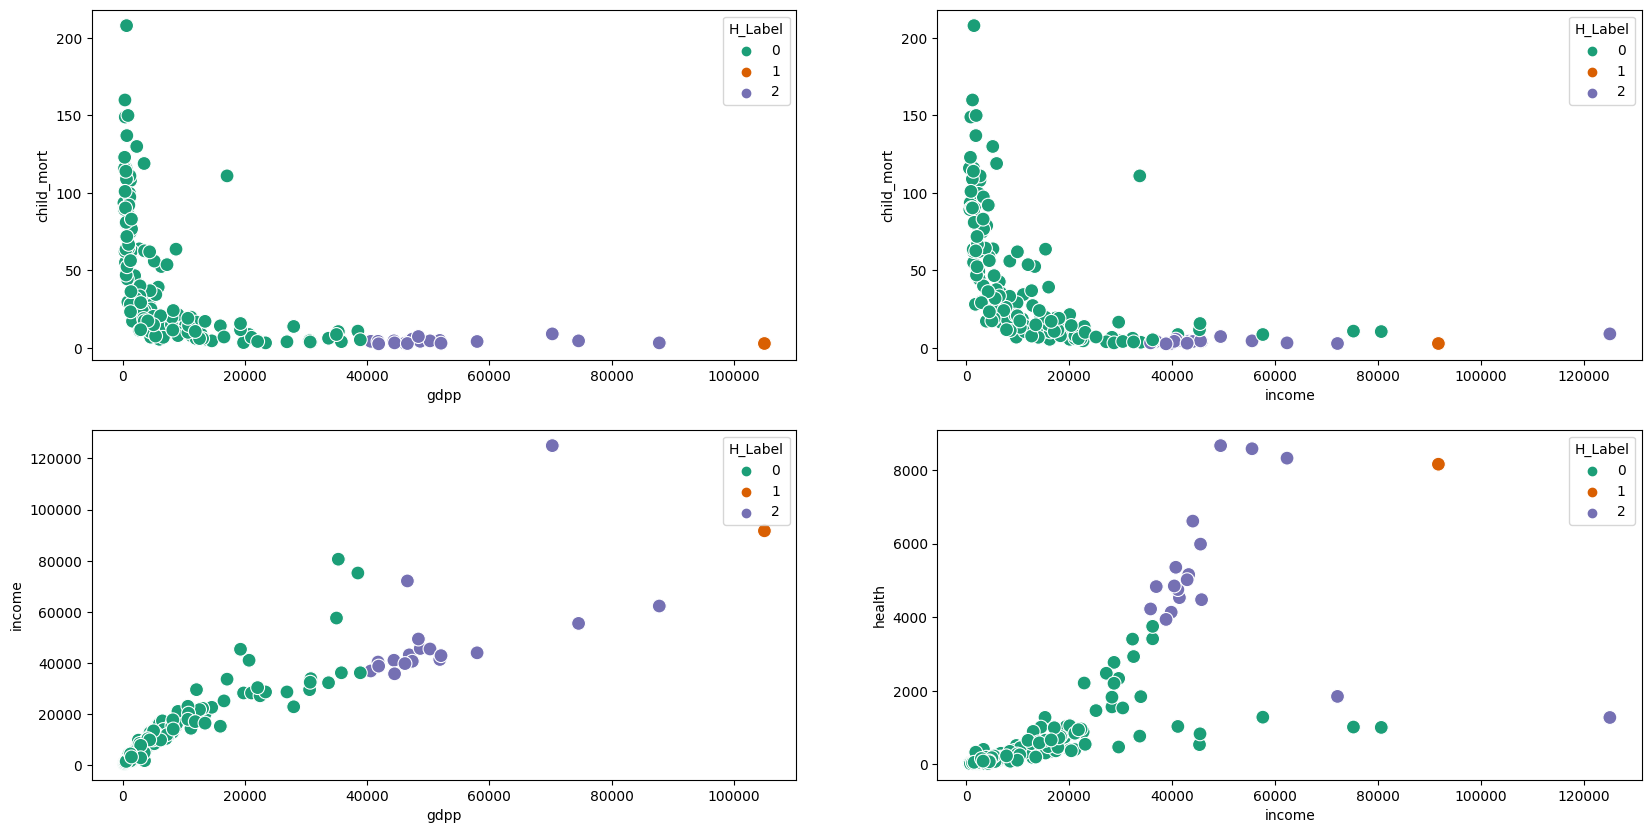

In [ ]:
# S1.1: Visualise clusters using scatter plots.
import seaborn as sns

fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10), dpi = 100)


sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'H_Label', ax = axis[0, 0],
                data = ngo_df, legend = 'full', palette = "Dark2", s = 100)

sns.scatterplot(x = 'income', y = 'child_mort', hue = 'H_Label', ax = axis[0, 1],
                data = ngo_df, legend = 'full', palette = "Dark2", s = 100)

sns.scatterplot(x = 'gdpp', y = 'income', hue = 'H_Label', ax = axis[1, 0],
                data = ngo_df, legend = 'full', palette = "Dark2", s = 100)

sns.scatterplot(x = 'income', y = 'health', hue = 'H_Label', ax = axis[1, 1],
                data = ngo_df, legend = 'full', palette = "Dark2", s = 100)

plt.show()

From the above graph, we observe that following three clusters are obtained:
- <b><font color = 'green'>Cluster `0`</b></font>: The countries in these clusters have high child mortality, low GDP and low income. Also, these countries have the lowest healthcare budgets.

- <b><font color = 'darkorange'>Cluster `1`</b></font>: As seen in the graph, there is only 1 country in this cluster that has very high GDP and income, extremely low child mortality and high spending on healthcare.

- <b><font color = 'blueviolet'>Cluster `2`</b></font>: The countries in these clusters have average GDP, low child mortality, good income and moderate spending on healthcare.

Let us analyse the mean and median values of all the features of each cluster by grouping `ngo_df` DataFrame based on cluster labels.



In [ ]:
# S1.2: Perform 'groupby' analysis to analyse the mean value of each column.
hc_analysis = ngo_df.groupby(['H_Label']).mean()
hc_analysis

<ipython-input-18-7f560a3ac354>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hc_analysis = ngo_df.groupby(['H_Label']).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
H_Label,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946
1,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000
2,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556


In [ ]:
# S1.3: Perform 'groupby' analysis to analyse the median value of each column.
hc_analysis = ngo_df.groupby(['H_Label']).median()
hc_analysis

<ipython-input-19-0af9adf80b8f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hc_analysis = ngo_df.groupby(['H_Label']).median()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
H_Label,,,,,,,,,
0,24.1,1389.79,227.482,1564.035,8510.0,5.9350,71.30,2.60,3885.0
1,2.8,183750.00,8158.500,149100.000,91700.0,3.6200,81.30,1.63,105000.0
2,4.2,24064.95,4840.100,19673.700,43050.0,1.0205,80.85,1.87,47900.0


You may observe a huge difference between mean and median values of the columns for cluster `0`. It may be due to the outliers in the dataset.

From both mean and median values, you may observe that the Cluster `0` countries have the highest child mortality, total fertility, and lowest value of other attributes like exports, healthcare budget, income, etc.

Let us create barplots for all the columns of `ngo_df` DataFrame except the `country` column. The $x$-axis of these barplots will show the cluster labels (i.e. `0`, `1`, `2`) and $y$-axis shows the corresponding column value for each cluster label.

Use subplots to display these 9 barplots colour coded with `bp_palette` colour palette.


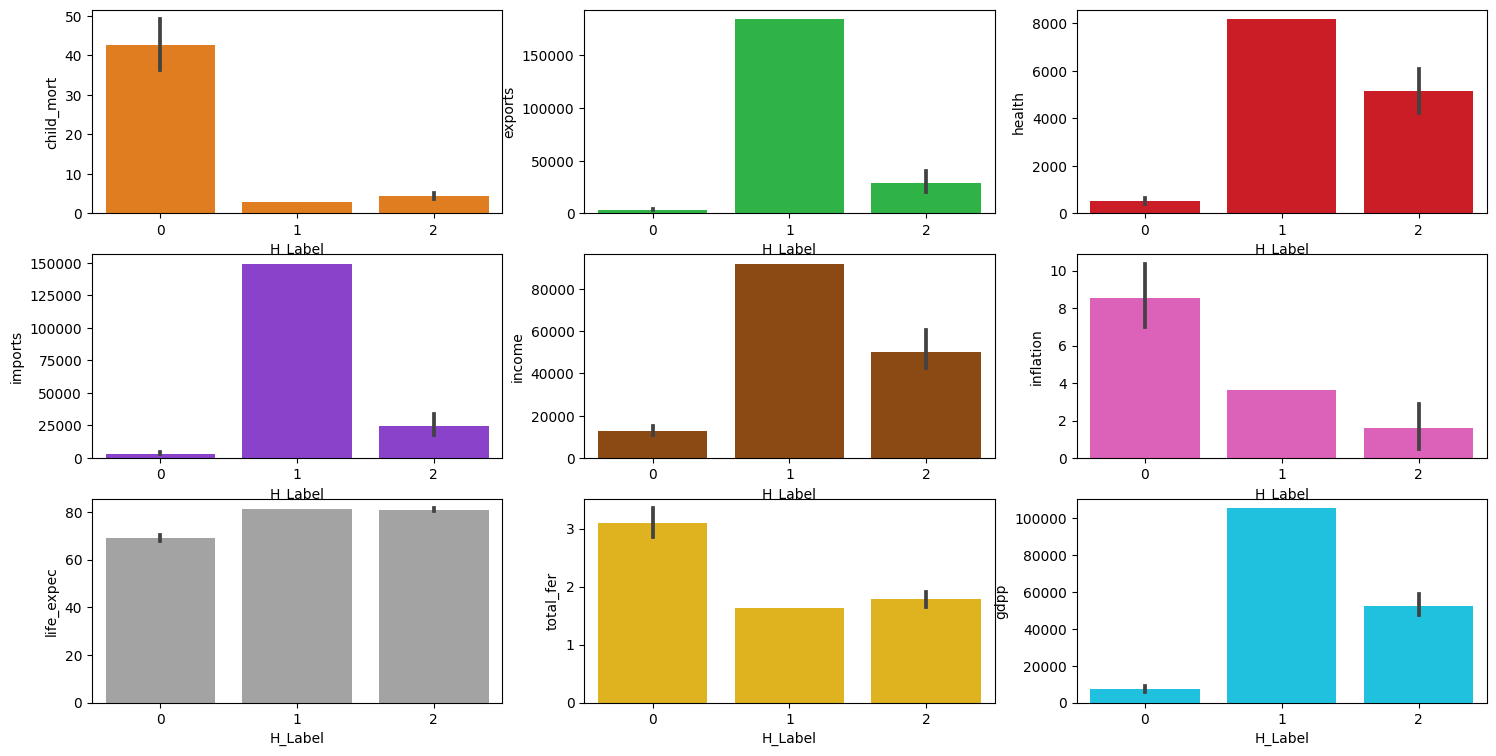

In [ ]:
# S1.4: Create barplot for all numeric columns using subplot.
fig2, axis2 = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 9), dpi = 100, sharex = False)
# As there are 9 columns, we created subplot having 3 rows and 3 columns.
count = 1         # initiliase count to 1 and not 0 to exclude 'country' column.

for i in range(0, 3):
  for j in range (0, 3):
    column = ngo_df.iloc[:, count]    # Fetching the current column and all rows of that column.
    sns.barplot(data = ngo_df, x = 'H_Label', y = column, ax = axis2[i, j], color = bp_palette[count])
    count = count + 1

plt.show()


Based on the graphs above,  we should consider cluster `0` countries for NGO aid, because :
- It has the highest child mortality.
- Lowest exports and imports.
- Lowest income.
- Lowest GDP.
- Lowest health expenditure.
- The highest inflation.
- Comparatively low life expectancy.
- Highest total fertility.

Let us list down top 10 countries that require financial aid on priority by sorting column values of `child_mort`, `income`, `health`, and `gdpp` columns.

For this, apply `sort_values()` function on `ngo_df` DataFrame for cluster label `0`. Sort `child_mort` column value in descending order and remaining three column values in ascending order, as we need countries having higher child mortality as well as lower income, healthcare budget and GDP in top 10.


In [ ]:
# S1.5: List top 10 countries of Cluster 0 that are in dire need of financial aid and store it in 'hc_top10' variable.
hc_top10 = ngo_df[ngo_df['H_Label'] == 0].sort_values(by = ['child_mort', 'income', 'health', 'gdpp'],
                                                      ascending = [False, True, True, True]).head(10)
hc_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,H_Label
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,0


Here are the list of top 10 countries of Cluster 0 that are in dire need of financial aid.

List top 10 country names only from the dataset.

In [ ]:
# S1.6: List down the values of 'country' column of 'hc_top10'
hc_top10['country']

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
Name: country, dtype: object

Hence, we obtained top 10 countries that require NGO aid on priority using Hierarchical clustering.

Let us apply K-Means clustering on the same dataset and determine which algorithm is giving better results.

---

#### Activity 2: Applying K-Means Clustering

We start by finding the optimal number of clusters for the K-Means algorithm. We will use the Elbow method.


Recall the steps for Elbow method:
1. Compute K-Means clustering for different values of `K` by varying `K` from `1` to `10` clusters for `ngo_scaled` DataFrame.
2. For each K, calculate the total within-cluster sum of squares (WCSS) using `inertia_` attribute of `KMeans` object.
3. Plot the curve of WCSS vs the number of clusters `K`.

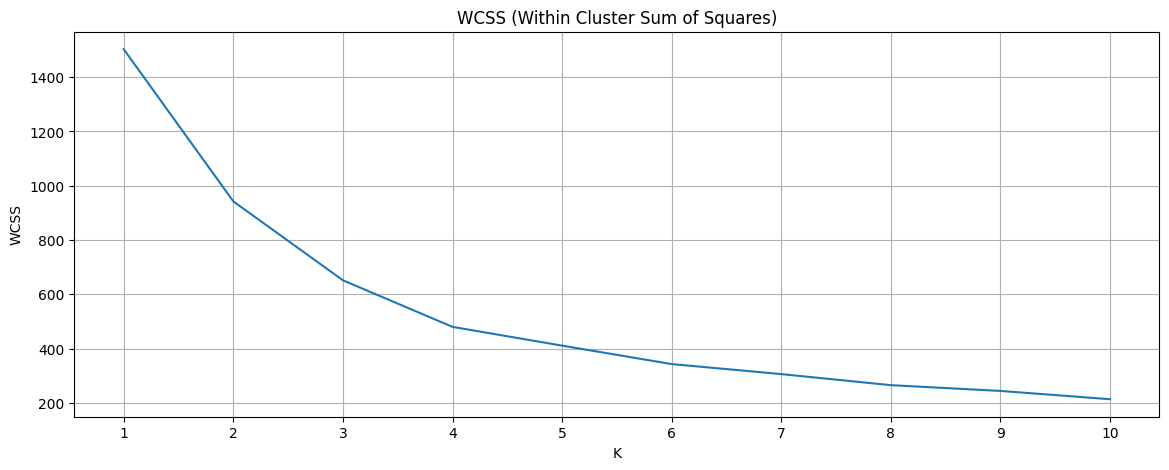

In [ ]:
# S2.1: Determine 'K' using Elbow method.
from sklearn.cluster import KMeans
wcss = []

clusters = range(1, 11)
# Initiate a for loop that ranges from 1 to 10.
for k in clusters:
    # Inside for loop, perform K-means clustering for current value of K. Use 'fit()' to train the model.
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(ngo_scaled)
    # Find wcss for current K value using 'inertia_' attribute and append it to the empty list.
    wcss.append(kmeans.inertia_)

# Plot WCSS vs number of clusters.
plt.figure(figsize = (14, 5))
plt.title('WCSS (Within Cluster Sum of Squares)')
plt.plot(clusters, wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid()
plt.xticks(range(1,11))
plt.show()

On observing the elbow curve, we can say that either 3 or 4 clusters would be an optimal choice.

In the case of Hierarchical clustering, we obtained 3 clusters of countries. Likewise, let us consider 3 clusters for K-Means as well so that we can compare the clusters obtained from both the clustering algorithms.

Now, perform K-Means clustering with `n_clusters = 3` parameter and determine the cluster labels.

**Note:** You can use the `fit_predict()` function for K-Means as well as used for the `AgglomerativeClustering` class.

In [ ]:
# S2.2: Cluster the 'ngo_scaled' dataset for K = 3
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters = 3, random_state = 10)

kcluster_3 = kmeans_3.fit_predict(ngo_scaled)
print(kcluster_3)

[2 1 1 2 1 1 1 0 0 1 1 1 1 1 1 0 1 2 1 1 1 2 1 0 1 2 2 1 2 0 1 2 2 1 1 1 2
 2 2 1 2 1 0 1 0 1 1 1 1 2 2 1 1 0 0 2 2 1 0 2 1 1 1 2 2 1 2 1 0 1 1 1 2 0
 1 0 1 0 1 1 2 2 0 1 2 1 1 2 2 1 1 0 1 2 2 1 1 2 0 2 1 1 1 1 1 1 2 1 2 1 0
 0 2 2 0 1 2 1 1 1 1 1 1 0 1 1 2 1 1 2 1 1 2 0 1 1 2 2 1 0 1 1 2 1 0 0 1 2
 1 2 2 1 1 1 1 2 1 0 0 0 1 1 1 1 1 2 2]


As you can see here, the dataset is divided into $3$ clusters labelled from `0` to `2`.

Let us add these predicted labels as a new column to our original `ngo_df` DataFrame.

In [ ]:
# S2.3: Add the cluster ID back to the 'ngo_df' DataFrame
ngo_df['K_Label'] = kcluster_3
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,H_Label,K_Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1


Count the number of countries in each cluster obtained from K-Means clustering.

In [ ]:
# S2.4: Check the country count per cluster
ngo_df['K_Label'].value_counts()

1    91
2    48
0    28
Name: K_Label, dtype: int64

We can see that the number of clusters formed using K-Means clustering and Hierarchical clustering are different.


Let us analyse the clusters obtained from K-Means by comparing how `child_mort`, `income`, `gdpp`, `health` vary for each cluster of countries.

For this, let us create following four scatter plot using subplots:
1. Scatter plot of `gdpp` vs `child_mort`.
2. Scatter plot of `income` vs `child_mort`.
3. Scatter plot of `gdpp` vs `income`.
4. Scatter plot of `income` vs `health`.



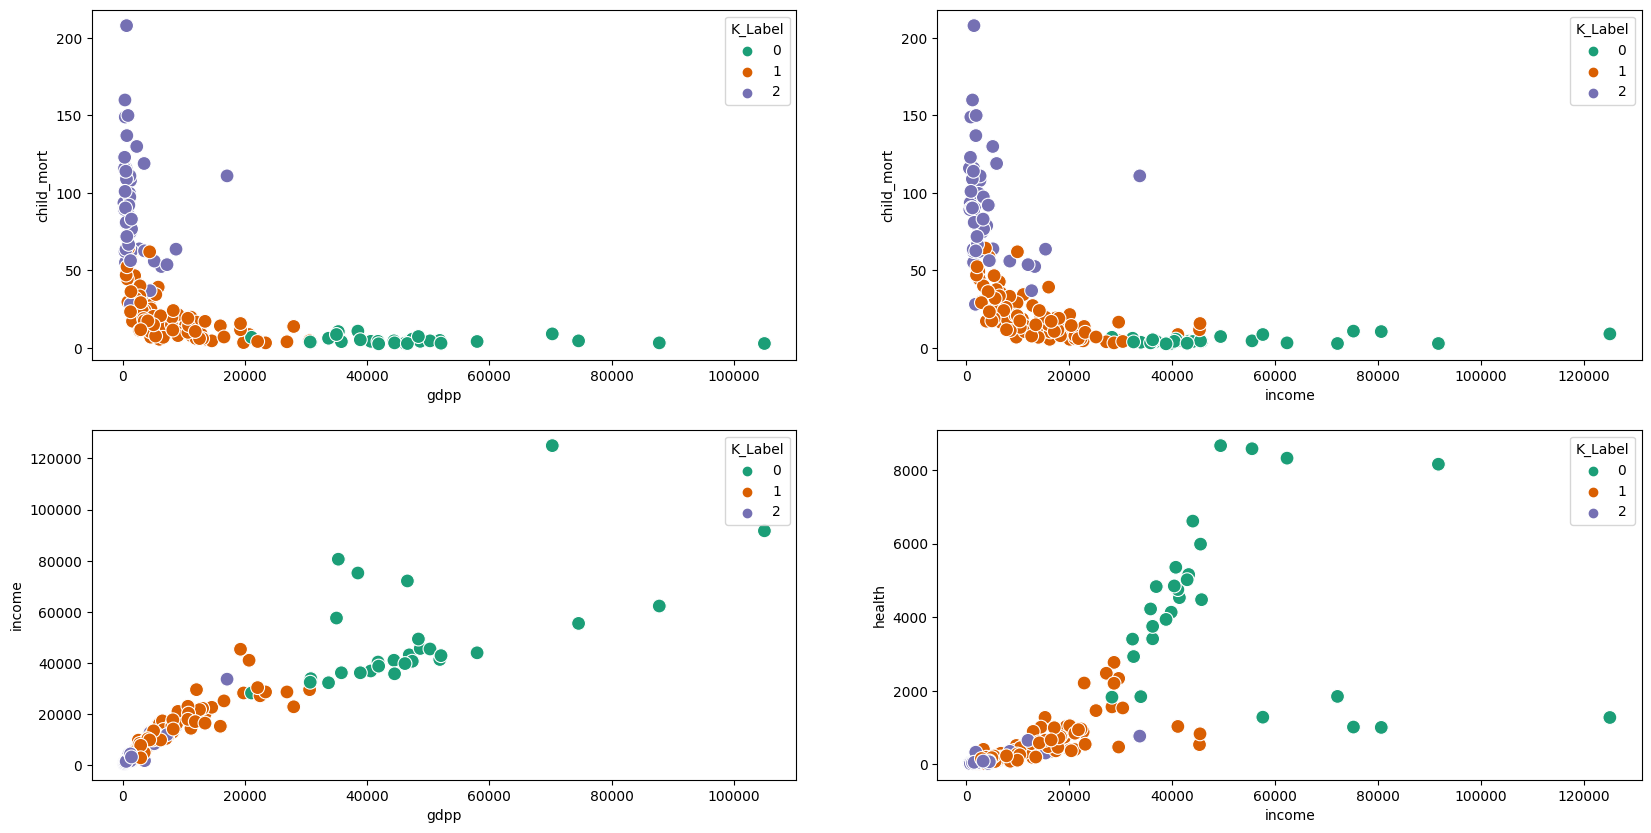

In [ ]:
# S2.5: Visualise the clusters using scatter plots.
import seaborn as sns

fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10), dpi = 100)


sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'K_Label', ax = axis[0, 0],
                data = ngo_df, legend = 'full', palette = "Dark2", s = 100)

sns.scatterplot(x = 'income', y = 'child_mort', hue = 'K_Label', ax = axis[0, 1],
                data = ngo_df, legend = 'full', palette = "Dark2", s = 100)

sns.scatterplot(x = 'gdpp', y = 'income', hue = 'K_Label', ax = axis[1, 0],
                data = ngo_df, legend = 'full', palette = "Dark2", s = 100)

sns.scatterplot(x = 'income', y = 'health', hue = 'K_Label', ax = axis[1, 1],
                data = ngo_df, legend = 'full', palette = "Dark2", s = 100)

plt.show()

From the above graph, we can observe that <b><font color = 'purple'>Cluster `2`</b></font> countries are the most vulnerable as they have high child mortality, low GDP and low income. Also, these countries have the lowest healthcare budgets.


Let us analyse the mean and median values of all the features of each cluster by grouping `ngo_df` DataFrame based on cluster labels obtained from K-Means.



In [ ]:
# S2.6: Perform 'groupby' analysis to analyse the mean value of each column.
km_analysis =  ngo_df.groupby(['K_Label']).mean()
km_analysis

<ipython-input-28-f93288e4ffae>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  km_analysis =  ngo_df.groupby(['K_Label']).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,H_Label
K_Label,,,,,,,,,,
0,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,1.321429
1,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000


In [ ]:
# S2.7: Perform 'groupby' analysis to analyse the median value of each column.
km_analysis =  ngo_df.groupby(['K_Label']).median()
km_analysis

<ipython-input-29-ff0278a78a39>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  km_analysis =  ngo_df.groupby(['K_Label']).median()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,H_Label
K_Label,,,,,,,,,,
0,4.25,23925.95,4349.2900,17494.400,42150.0,1.395,80.6,1.865,45350.0,2.0
1,17.20,1806.92,365.6800,2364.930,11200.0,5.140,74.1,2.170,5450.0,0.0
2,89.75,196.26,51.6135,339.306,1860.0,8.855,59.8,5.055,932.0,0.0


**Note:** Ignore the `H_Label` column values in the above DataFrame.

You may observe the difference between mean and median values of the columns for all the clusters. It may be due to the outliers in the dataset.

From both mean and median values, you may observe that the Cluster `2` countries have the highest child mortality and total fertility and lowest value of other attributes like exports, healthcare budget, income, etc.

Let us again create barplots for all the columns of `ngo_df` DataFrame except the `country` column.


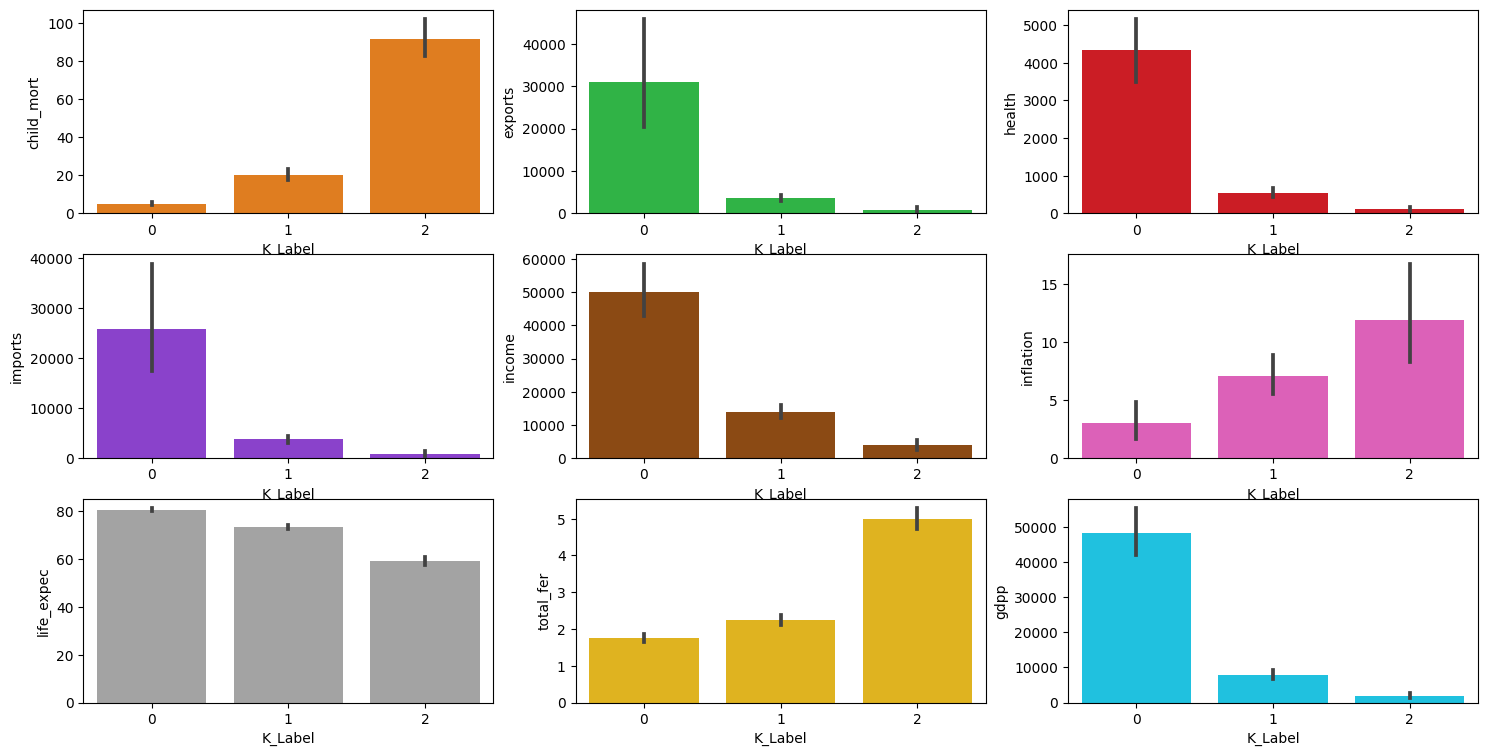

In [ ]:
# S2.8: Create barplots for numeric columns using subplot.
fig2, axis2 = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 9), dpi = 100, sharex = False)
# As there are 9 columns, we created subplot having 3 rows and 3 columns.
count = 1

for i in range(0, 3):
  for j in range (0, 3):
    column = ngo_df.iloc[:, count]    # Fetching the current column and all rows of that column.
    sns.barplot(data = ngo_df, x = 'K_Label', y = column, ax = axis2[i, j], color = bp_palette[count])
    count = count + 1

plt.show()

These plots are similar to Hierarchical clustering algorithm plots and hence our analysis is good. Hence, based on the graphs above,  we should consider cluster `2` countries for NGO aid.

Let us list down top 10 countries that require financial aid on priority by sorting column values of `child_mort`, `income`, `health`, and `gdpp` columns.

For this, apply `sort_values()` function on `ngo_df` DataFrame for cluster label `2`, as done for Hierarchical clustering.

In [ ]:
# S2.9: List top 10 countries of Cluster 2 that are in dire need of financial aid and store it in 'km_top10' variable.
km_top10 = ngo_df[ngo_df['K_Label'] == 2].sort_values(by = ['child_mort','income', 'health', 'gdpp'],
                                                      ascending = [False, True, True, True]).head(10)
km_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,H_Label,K_Label
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0,2
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0,2
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0,2
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,0,2
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,0,2


In [ ]:
# S2.10: List down the values of 'country' column of 'km_top10'
km_top10['country']

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
Name: country, dtype: object

Let us find out whether the top 10 countries that are in dire need of financial aid are the same or different for both clustering algorithms.

In [ ]:
# S2.10: Compare countries of 'km_top10' with 'hc_top10'.
list(km_top10['country']) == list(hc_top10['country'])

True

We can see that though the number of clusters obtained using K-Means and Hierarchical clustering are different, both the algorithms provided the same 10 countries which require the aid of NGO.

Now that we have explored two main unsupervised learning algorithms, let us learn a few evaluation metrics for clustering algorithms.


---

#### Activity 3: Evaluating Clustering Algorithms

We had already explored various evaluation metrics like RMSE, MAE, $R^2$, etc. to validate the performance of  various supervised learning algorithms.

However, in the case of unsupervised learning, evaluating the algorithm performance is not very straightforward as we do not have the ground truth.  It is not as trivial as counting the number of errors or the precision and recall as in supervised learning algorithms, due to absence of true labels.

The clustering algorithms are evaluated based on some similarity and dissimilarity measures. A good clustering algorithm will split the dataset into clusters in such a way that:

- The objects in the same cluster are similar or to each other as much as possible.
- The objects belonging to different clusters are highly distinct from each other.

The two most popular evaluation metrics for clustering algorithms are the Silhouette score and DB Index.

**1. Silhouette score:**

We had already explored the Silhouette score in one of the previous lessons. Let us recall that.

- The silhouette coefficient of each data point measures how much that data point is similar or close to its own cluster and how much it is distinct from other clusters.

- The silhouette coefficient of data point $i$ is calculated as:

\begin{align}
  s(i) = \frac{b(i)-a(i)}{\text{max}(b(i),a(i))}
\end{align}

where,

  - $b(i)$: It is the average distance of the data point $i$ with all the points in the closest cluster to its cluster. It is also known as *Mean Inter-cluster distance*.
  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/6a2b08d7-145c-4c9b-957f-9ab9be8dc685.gif"/></center>

  - $a(i)$: It is the average distance of data point $i$ with all other points in the same clusters. It is also known as *Mean Intra-cluster distance*.

  <center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/dfa627bd-9097-43df-b54b-0e327c417163.gif"/></center>

After calculating the silhouette coefficient for each point, average it out to get the **Silhouette score**. The Silhouette score  falls within the range `[-1, 1]`. Higher Silhouette scores indicate dense and well-separated clusters.

We can obtain the Silhouette score using the `silhouette_score` class of `sklearn.metrics` module.

> **Syntax:** `sklearn.metrics.silhouette_score(dataset, cluster_labels`)

> where,
  - `dataset`: The dataset which needs to be clustered.
  - `cluster_labels`: The cluster labels predicted by clustering algorithm.

Let us now calculate the Silhouette score for both the clustering algorithms and determine which algorithm has better score.

In [ ]:
# S3.1: Calculate Silhouette score of Hierarchical clustering.
from sklearn.metrics import silhouette_score

silhouette_score(ngo_df.iloc[:, 1:], ngo_df['H_Label'])  # exclude 'country' column from 'ngo_df' otherwise you will get error

0.6770471416714077

In [ ]:
# S3.2: Calculate Silhouette score of K-Means clustering.
silhouette_score(ngo_df.iloc[:,1:], ngo_df['K_Label'])

0.17640927883201196

You may observe that Hierarchical clustering has a higher Silhouette score as compared to K-Means. This means that the clusters obtained from Hierarchical clustering are dense and well separated, which relates to the standard concept of a cluster.

**2. DB Index**

Another metric for evaluating a clustering algorithm is **Davies–Bouldin** index (DB index).

- It is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.


\begin{align}
\text{DBI} = \frac{1}{k} \sum_{i = 1}^{k} \underset{i \neq j}{\max} \left\{\frac {\sigma_i + \sigma_j}{\delta(c_i, c_j)}\right\}
\end{align}

where,
  - $k$ is the number of clusters.
  - $\delta(c_i, c_j)$ is the distance between centroid clusters $c_i$ and $c_j$ i.e. intercluster distance.

  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/776000d4-5c61-46ca-b3cd-07ef5db420a1.png"/></center>
  - $\sigma_i$ is the average distance within cluster $i$ i.e. the intracluster distance of Cluster $i$.

  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/743a2745-4173-47bd-996e-6f01ca21dfe8.png"/> </center>

Thus, like silhouette coefficient, the DB index captures both the separation and compactness of the clusters.

But unlike silhouette coefficient, as DB index falls, the clustering improves. Lower DB index values indicate that the clusters are far enough and less scattered.


We can obtain the DB index using `davies_bouldin_score()` function of `sklearn.metrics` module.


> **Syntax:** `sklearn.metrics.davies_bouldin_score(dataset, cluster_labels`)

> where,
  - `dataset`: The dataset to be clustered.
  - `cluster_labels`: The cluster labels predicted by clustering algorithm.

Let us now calculate the DB score for both the clustering algorithms and determine which algorithm has better score.

In [ ]:
# S3.3: Calculate DB score of Hierarchical clustering.
from sklearn.metrics import davies_bouldin_score
hc_dbscore = davies_bouldin_score(ngo_df.iloc[:,1:], ngo_df['H_Label'])
hc_dbscore

0.46012636384883754

In [ ]:
# S3.4: Calculate DB score of K-Means clustering.
km_dbscore = davies_bouldin_score(ngo_df.iloc[:,1:], ngo_df['K_Label'])
km_dbscore

1.0070526266323647

You may observe that K-Means have a very bad DB index score clearly indicating that the clusters are not well separated and are highly scattered. This was also evident in the scatterplots obtained for K-Means clustering.

Hence, both the scores indicated that the Hierarchical clustering formed better clusters than K-Means for the NGO problem statement.



In the next class, we will explore a new problem statement and learn a dimensionality reduction technique.

---

#### Activities

<br>

**Teacher Activities:**

1. Hierarchical Clustering - Evaluation Metrics (Class Copy)

   Link on Panel
   
2. Hierarchical Clustering - Evaluation Metrics (Reference)

   https://colab.research.google.com/drive/1VVx9l5wij_lLXz3eVKwsaUvZin_E6erg